<div align = center>
<h2> Feature selection</h2>
</div>


### Titanic Survival Prediction in Python

Consider the Titanic dataset for your practical work, and test feature-
engineering impact on the results.

- Get the data, and then give a short description using corresponding
statistical indicators.
- Clean the data by dealing with missing values, dropping unnecessary
features, standardizing the data...etc.
- Measure the information gain of each feature on the Survived
passengers.

- Test different configurations to build a classification model using K-
NN algorithm by: <br>
 (a) testing different number of features<br>
 (b) different number of K.<br>
 (c) different similarity measure. <br>
    o Use precision for validating results. <br>
- Visualize and interpret results.


In [40]:
import pandas as pd

print(pd.__version__)

2.1.2


### Step 01 : loading, exploring adn understanding the data

In [41]:
# Get the data
df = pd.read_csv("dataset/train.csv")
# Descibe it with statistical indicators
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's explore our dataset more in depth : 

| Variable  | Definition                         | Key                                            |
|-----------|------------------------------------|------------------------------------------------|
| survival  | Survival                           | 0 = No, 1 = Yes                                |
| pclass    | Ticket class                       | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex       | Sex                                |                                                |
| Age       | Age in years                       |                                                |
| sibsp     | # of siblings / spouses aboard     | the Titanic                                    |
| parch     | # of parents / children aboard     | the Titanic                                    |
| ticket    | Ticket number                      |                                                |
| fare      | Passenger fare                     |                                                |
| cabin     | Cabin number                       |                                                |
| embarked  | Port of Embarkation                | C = Cherbourg, Q = Queenstown, S = Southampton |


#### Variable Notes
- pclass: A proxy for socio-economic status (SES) <br>
    1st = Upper <br>
    2nd = Middle <br>
    3rd = Lower <br>

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 <br>

- sibsp: The dataset defines family relations in this way... <br>
    Sibling = brother, sister, stepbrother, stepsister <br>
    Spouse = husband, wife (mistresses and fiancés were ignored) <br>
    
- parch: The dataset defines family relations in this way...<br>
    Parent = mother, father <br>
    Child = daughter, son, stepdaughter, stepson <br>
    Some children travelled only with a nanny, therefore parch=0 for them. <br>
- Fare : the amount of money paid for the ticket by each passenger

In [43]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [44]:
# get the correlation between the features and the 'Survived' feature
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix['Survived'].sort_values(ascending=False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


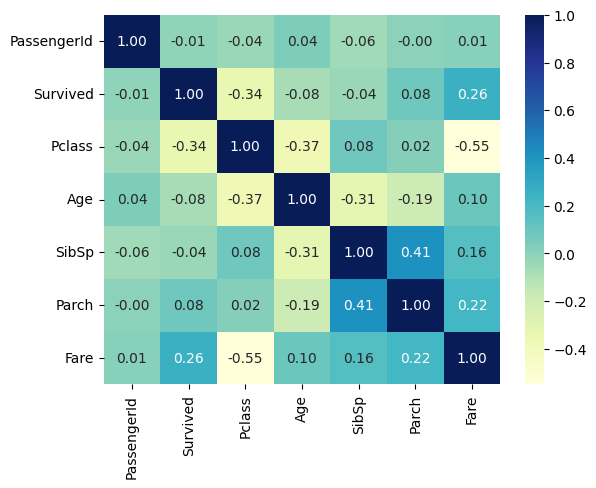

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
correlation_matrix = df[numeric_columns].corr()


sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
print(list(df.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [48]:
#  Clean the data by dealing with missing values, dropping unnecessary features, standardizing the data

print(f"The df shape before cleaning: {df.shape}")
print(f"The number of null values before cleaning :  {df.isnull().sum().sum()}")

# drop duplicates
df.drop_duplicates(inplace=True)

# drop the column cabin with too many missing values
# drop the name and ticket columns as it's insignificant
cleaned_df = df.drop(columns=["Cabin", "Name", "Ticket"])


# imputate the age column  anf name column
mean_age = cleaned_df["Age"].mean()
cleaned_df["Age"].fillna(mean_age, inplace=True)


# drop 2 rows with missing values in the embarked column
cleaned_df.dropna(subset=["Embarked"], inplace=True)

print(f"\nthe df shape after cleaning : {cleaned_df.shape}")
print(f"The number of null values after cleaning :  {cleaned_df.isnull().sum().sum()}")

The df shape before cleaning: (891, 12)
The number of null values before cleaning :  866

the df shape after cleaning : (889, 9)
The number of null values after cleaning :  0


In [49]:
cleaned_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cleaned_df[["Age", "Fare"]] = scaler.fit_transform(cleaned_df[["Age", "Fare"]])

cleaned_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,-0.590495,1,0,-0.500240,S
1,2,1,1,female,0.643971,1,0,0.788947,C
2,3,1,3,female,-0.281878,0,0,-0.486650,S
3,4,1,1,female,0.412509,1,0,0.422861,S
4,5,0,3,male,0.412509,0,0,-0.484133,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,-0.204724,0,0,-0.384475,S
887,888,1,1,female,-0.821957,0,0,-0.042213,S
888,889,0,3,female,0.003524,1,2,-0.174084,S
889,890,1,1,male,-0.281878,0,0,-0.042213,C


Measure the information gain of each feature <br>
he mutual_info_classif function in scikit-learn requires numerical input, and it cannot handle categorical variables directly. To use mutual information for feature selection when you have categorical variables, you need to encode them into a numerical format.

In [59]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

X = cleaned_df.drop("Survived", axis=1)
y = cleaned_df["Survived"]

# Encode the categorcial column : gender 0 : female , 1 : male
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)
mutual_info = mutual_info_classif(X_encoded, y)

feature_mutual_info = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)
print(f"Information Gain for Each Feature in descending order:\n{feature_mutual_info}")

Information Gain for Each Feature in descending order:
Sex            0.146551
Fare           0.121912
Pclass         0.076517
Embarked       0.036017
Parch          0.021224
PassengerId    0.017681
SibSp          0.011068
Age            0.001252
dtype: float64


As we can see, the Sex, Fare and passenger class are the most influential features in regard of the target feature 'Survived'

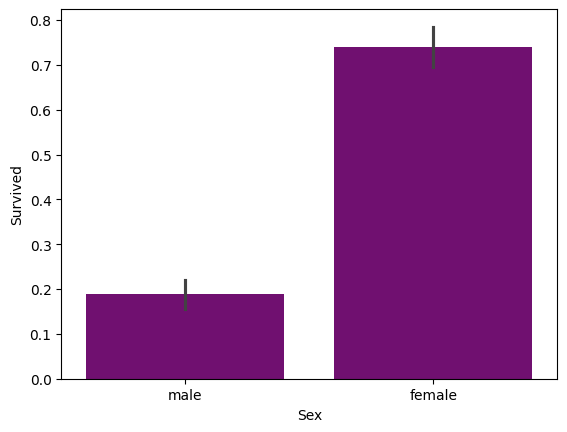

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=cleaned_df, x='Sex', y='Survived', color='purple')
plt.show()


It is obvious that female has much higher survival rate than male.

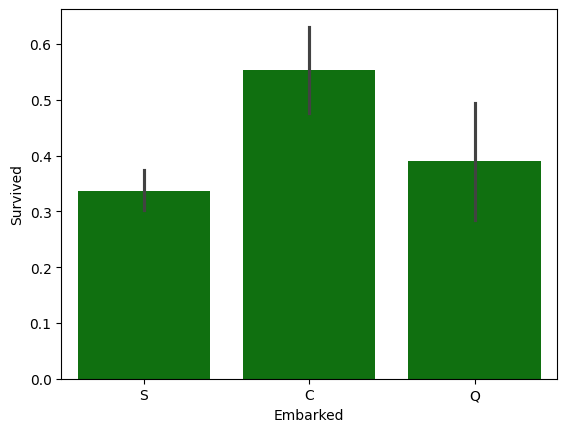

In [72]:
sns.barplot(data=cleaned_df, x='Embarked', y='Survived', color='green')
plt.show()

The majority passengers embarked Titanic at the port of Southampton, but people embarked at Cherbourg has the highest survival compare to others.

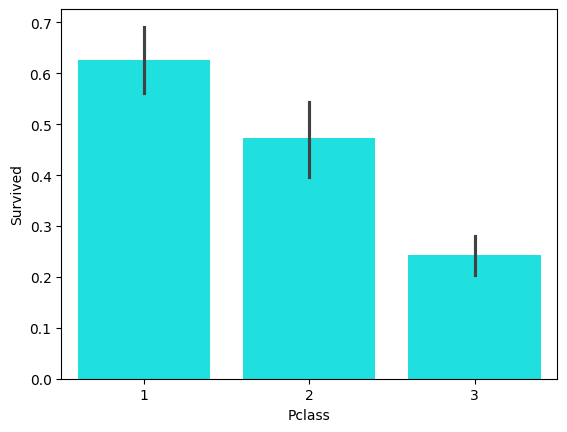

In [77]:
sns.barplot(data=cleaned_df, x='Pclass', y='Survived', color='cyan')
plt.show()

Again, passengers from upper class has the highest survival rate which is near 65%. Lower class passengers has the lowest survival rate(around 27%

Now we have ideas about what features to choose for building prediction model. Those features are Pclass, Sex, Fare and Embarked.

In [52]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score


# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)
# print(X_train.shape)
# print(X_test.shape)
# Test different configurations of number of features, k values, and distance measures
features_to_test = [2, 3, 4]
k_values = [3, 5, 7]
distance_measures = ["euclidean", "manhattan", "cosine"]

results = []

# try all possible combinations
for num_features in features_to_test:
    for k in k_values:
        for distance_measure in distance_measures:
            # Select the top 'num_features' based on mutual information
            top_features = list(X.columns[np.argsort(mutual_info)[-num_features:]]) 
            # Train the K-NN classifier
            knn_classifier = KNeighborsClassifier(
                n_neighbors=k, metric=distance_measure
            )
            knn_classifier.fit(X_train[top_features], y_train)

            # Make predictions on the test set
            y_pred = knn_classifier.predict(X_test[top_features])

            # Measure precision
            precision = precision_score(y_test, y_pred)
            # Store the results in a dict
            results.append(
                {
                    "NumFeatures": num_features,
                    "K": k,
                    "DistanceMeasure": distance_measure,
                    "Precision": precision,
                }
            )

# Visualize and interpret results
results_df = pd.DataFrame(results)
results_df

,NumFeatures,K,DistanceMeasure,Precision
0,2,3,euclidean,0.695652
1,2,3,manhattan,0.704225
2,2,3,cosine,0.250000
3,2,5,euclidean,0.696970
4,2,5,manhattan,0.696970
5,2,5,cosine,0.670588
6,2,7,euclidean,0.656250
7,2,7,manhattan,0.676923
8,2,7,cosine,0.687500
9,3,3,euclidean,0.657534


In [53]:
# try the prediction with the best combination
# k= 3 , 4 top features, distance metric : cosine




In [54]:
# get the com with maximum precision
best_combi_row = results_df.loc[results_df["Precision"].idxmax()]

print(f"The best combination is :\n\n{best_combi_row}")


The best combination is :

NumFeatures               4
K                         3
DistanceMeasure      cosine
Precision          0.724638
Name: 20, dtype: object


C:\Users\PC CABA DZ\AppData\Local\Temp\ipykernel_23620\3519591517.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


<Figure size 1500x1200 with 0 Axes>

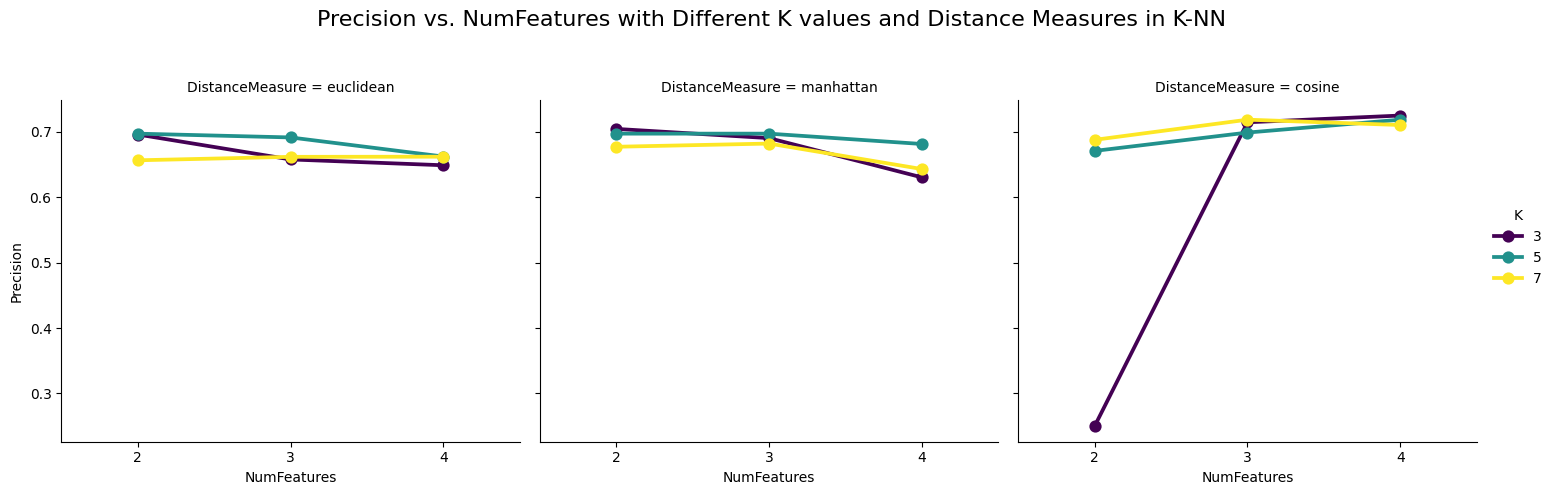

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a catplot with pointplot
plt.figure(figsize=(15, 12))
sns.catplot(
    data=results_df,
    x="NumFeatures",
    y="Precision",
    hue="K",
    col="DistanceMeasure",
    kind="point",
    markers="o",
    linestyles="-",
    palette="viridis",
    ci=None,
)
plt.subplots_adjust(top=0.80)
plt.suptitle(
    "Precision vs. NumFeatures with Different K values and Distance Measures in K-NN",
    fontsize=16,
)
plt.xlabel("NumFeatures")
plt.ylabel("Precision")
plt.show()